(a) Data Processing

1. Download and read the data. For Python, you may use pandas library and use read csv
function.

In [2695]:
import pandas as pd
train_data=pd.read_csv('data_train.csv')
test_data=pd.read_csv('data_test.csv')

2. Print the first 5 rows of the data using the command. (You may use head() function in
pandas library). Print the shape of the training dataframe. Write a short description of
the data.

In [2698]:
print("First 5 rows of the training data:")
train_data=train_data.drop('Unnamed: 0', axis=1)
train_data.head()

First 5 rows of the training data:


,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,797.0,-200.0,2.1,593.0,146.0,1212.0,72.0,984.0,494.0,10.8,49.7,0.6429
1,1282.0,-200.0,11.0,1013.0,354.0,545.0,141.0,1384.0,1287.0,17.4,50.6,0.9989
2,891.0,-200.0,7.6,882.0,342.0,885.0,149.0,950.0,894.0,7.8,33.9,0.3594
3,1285.0,-200.0,18.1,1243.0,481.0,599.0,173.0,1815.0,1582.0,26.4,41.9,1.4237
4,892.0,-200.0,7.3,869.0,71.0,953.0,77.0,1363.0,632.0,37.4,14.7,0.9295


In [2700]:
print("First 5 rows of the test data:")
test_data=test_data.drop('Unnamed: 0', axis=1)
test_data.head()

First 5 rows of the test data:


,NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,-200.0,8.0,898.0,122.0,933.0,105.0,1594.0,1098.0,17.0,51.7,0.9914
1,-200.0,19.4,1281.0,-200.0,774.0,-200.0,1952.0,1324.0,20.8,43.6,1.0614
2,-200.0,9.9,975.0,349.0,638.0,223.0,1243.0,1064.0,5.6,74.6,0.6826
3,-200.0,12.7,1075.0,103.0,749.0,98.0,1690.0,1022.0,31.7,21.5,0.9902
4,-200.0,2.9,647.0,131.0,1054.0,85.0,962.0,828.0,8.4,54.5,0.6022


In [2702]:
print("Shape of training data: ",train_data.shape)
print("Shape of testing data: ", test_data.shape)

Shape of training data:  (6250, 12)
Shape of testing data:  (3221, 11)


3. Does the data have any missing values? How many are missing? Return the number of
missing values. (In pandas, check out isnul() and isnul().sum())

In [2705]:
null_values=train_data.isnull().sum()
print("The number of null values in each columns are:\n", null_values)

The number of null values in each columns are:
 PT08.S1(CO)      77
NMHC(GT)         77
C6H6(GT)         77
PT08.S2(NMHC)    77
NOx(GT)          77
PT08.S3(NOx)     77
NO2(GT)          77
PT08.S4(NO2)     77
PT08.S5(O3)      77
T                77
RH               77
AH               77
dtype: int64


77 rows in the training data have been found with null values

4. Drop all the rows with any missing data. (In pandas, check out dropna(). dropna() accepts
an argument inplace, check out what it does and when it comes in handy.)

In [2709]:
train_data.dropna(inplace=True)
print(train_data.shape)

(6173, 12)


77 rows dropped

5. Extract the features and the label. The label is PT08.S1(CO).

In [2713]:
#target="PT08.S1(CO)"
#y_train=new_data[target]
#X_train=new_data.drop(columns=[target])
#print(y_train.shape, X_train.shape)

(b) Exploratory Data Analysis (10 points)

1. Plot the histograms of all the features in the data. Do all the features have a normal
distribution? Do you see any outlier values? Do you need to apply any normalization
technique to these values? If so, you can transform your data in this step and explain
your thought process in the corresponding markdown cell.

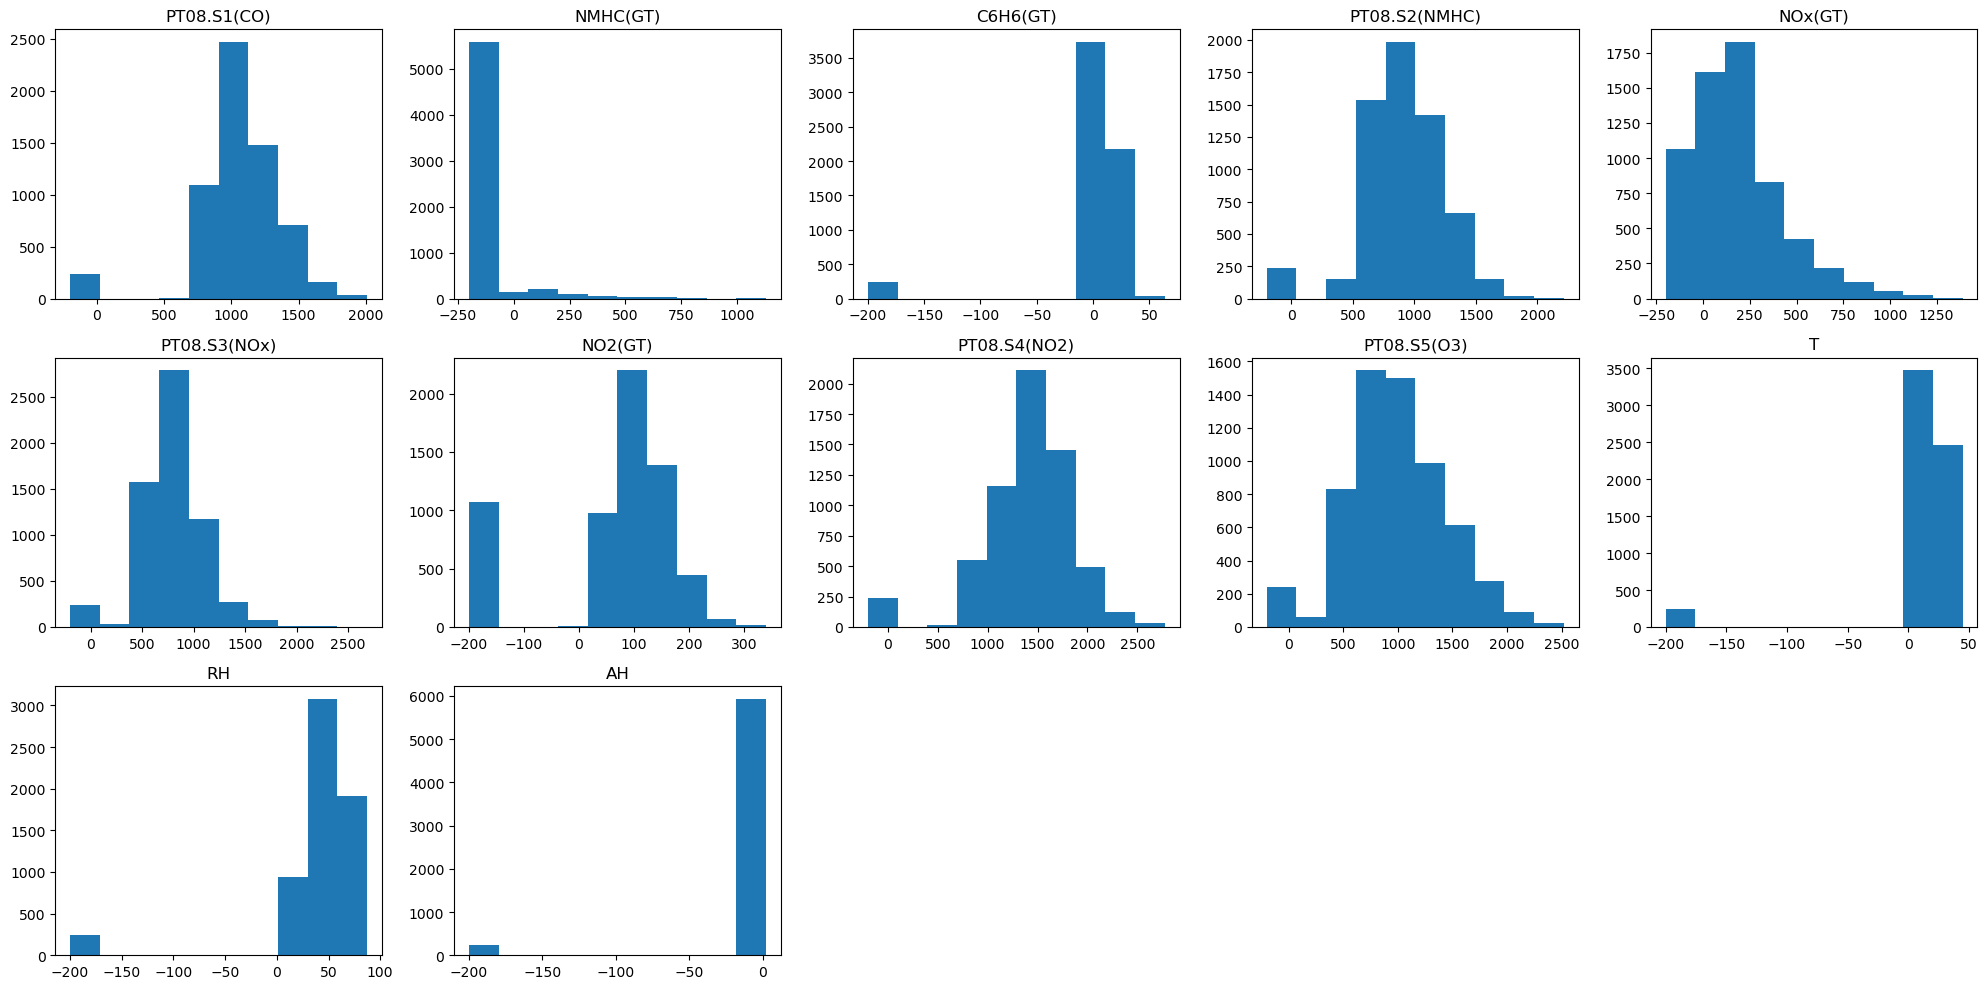

In [2717]:
import matplotlib.pyplot as plt
train_data.hist(bins=10, figsize=(20, 10), layout=(3, len(train_data.columns)-7), grid=False)
plt.tight_layout()
plt.show()

We can see that many of the columns, have an abundant amount of the value -200. Let us replace these values with the column mean. We also observe that the column, NMHC(GT) has most of it's values as -200, dropping this column.

In [2720]:
train_data=train_data.drop(columns=['NMHC(GT)'])
train_data=train_data.mask(train_data==-200)
train_data=train_data.dropna(how="all")
X_mean=train_data.mean()
train_data.fillna(X_mean, inplace=True)

In the above cell, we have replaced all the -200 values with null, and then dropped all the rows that have null values for all the columns. For the remaining null values, we have replaced them with the column mean.

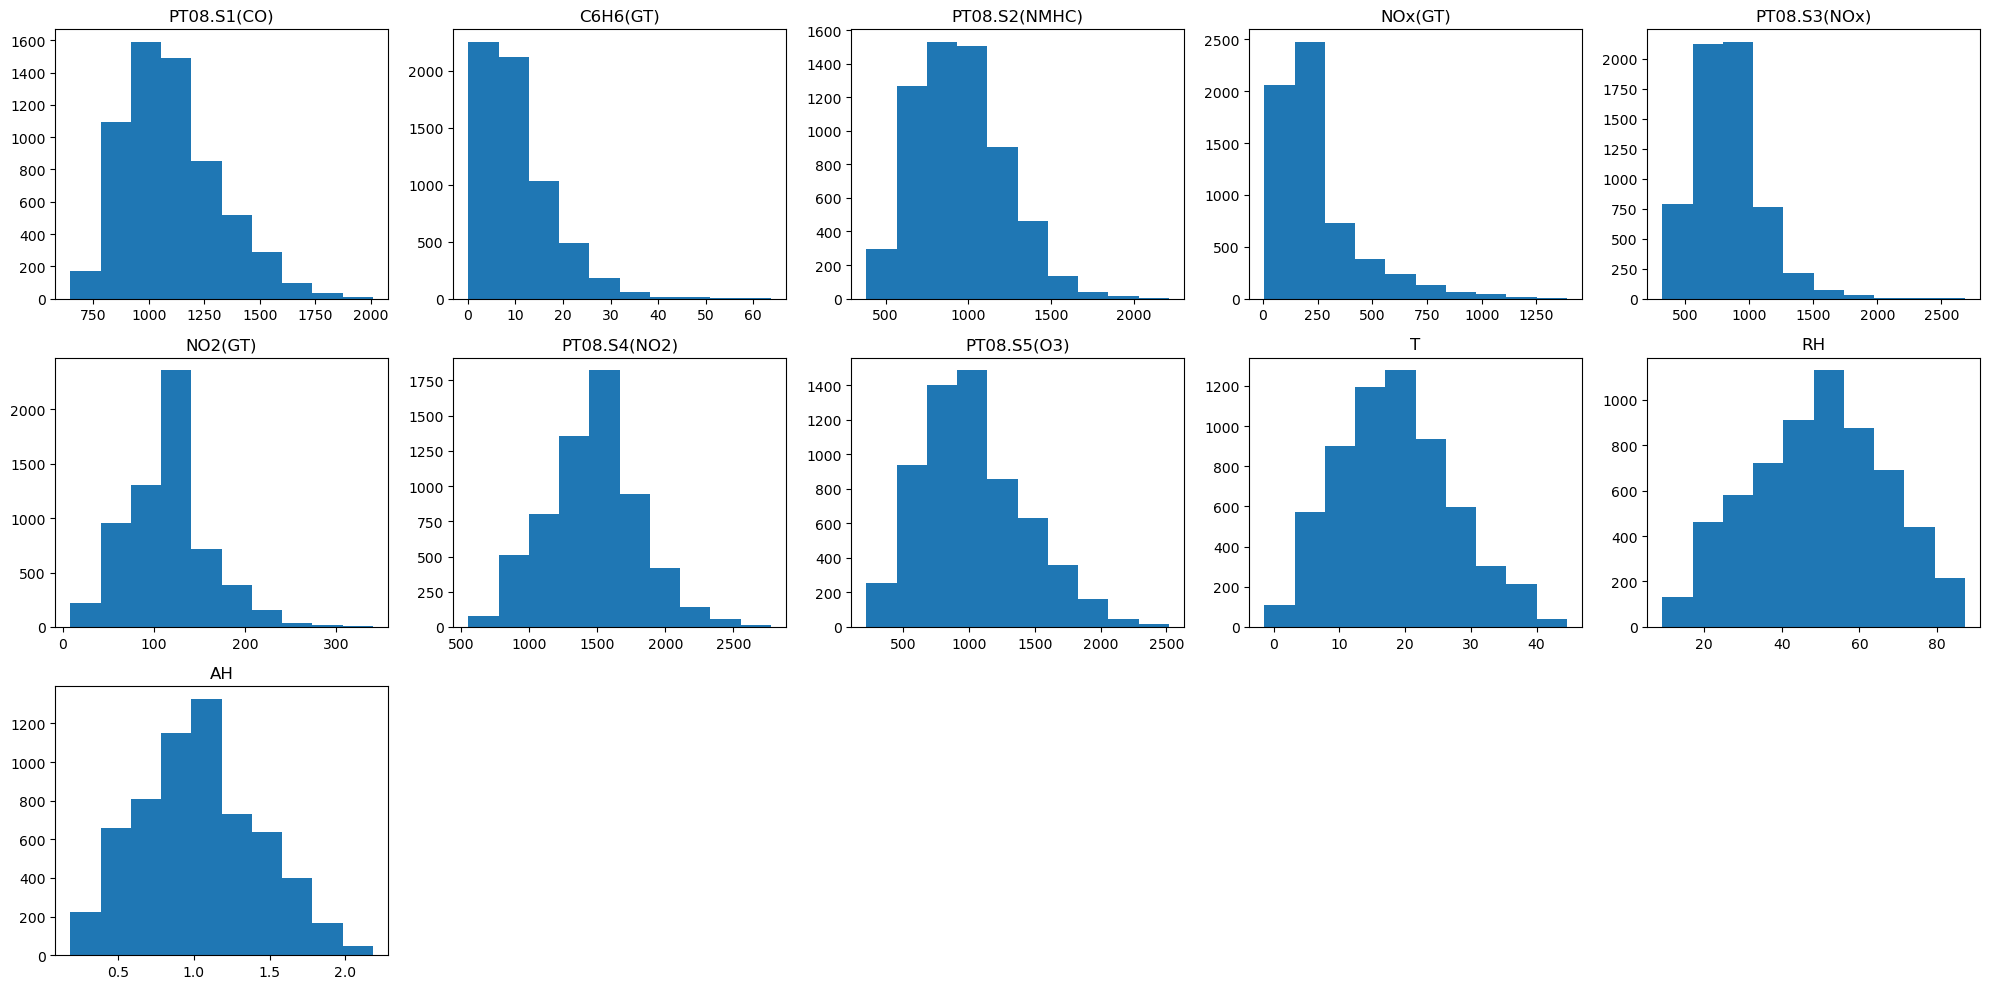

In [2723]:
train_data.hist(bins=10, figsize=(20, 10), layout=(3, len(train_data.columns)-6), grid=False)
plt.tight_layout()
plt.show()

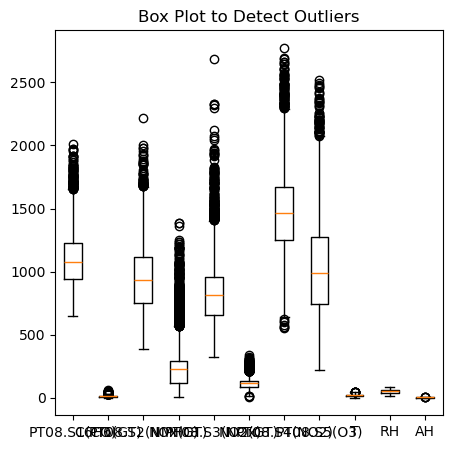

In [2724]:
plt.figure(figsize=(5, 5))
plt.boxplot(train_data.values, labels=train_data.columns)
plt.title("Box Plot to Detect Outliers")
plt.show()

Let us use the Inter-quartile range method to remove outliers.

In [2728]:
Quarter_1 = train_data.quantile(0.25)
Quarter_3 = train_data.quantile(0.75)
lower_bound = Quarter_1 - 1.5 * (Quarter_3 - Quarter_1)
upper_bound = Quarter_3 + 1.5 * (Quarter_3 - Quarter_1)
train_data = train_data[~((train_data < lower_bound) | (train_data > upper_bound)).any(axis=1)]
print(train_data.shape)

(5297, 11)


The outliers have been removed

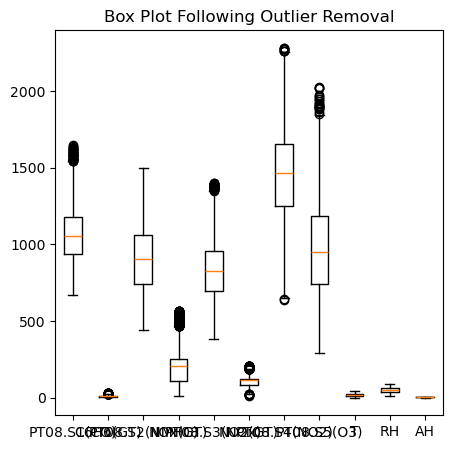

In [2731]:
plt.figure(figsize=(5, 5))
plt.boxplot(train_data.values, labels=train_data.columns)
plt.title("Box Plot Following Outlier Removal")
plt.show()

2. Pick 2 features and create a scatter plot to illustrate the correlation between these two
features. Is there a high correlation between these features?

Correlation between  and :  0.8268516920229845


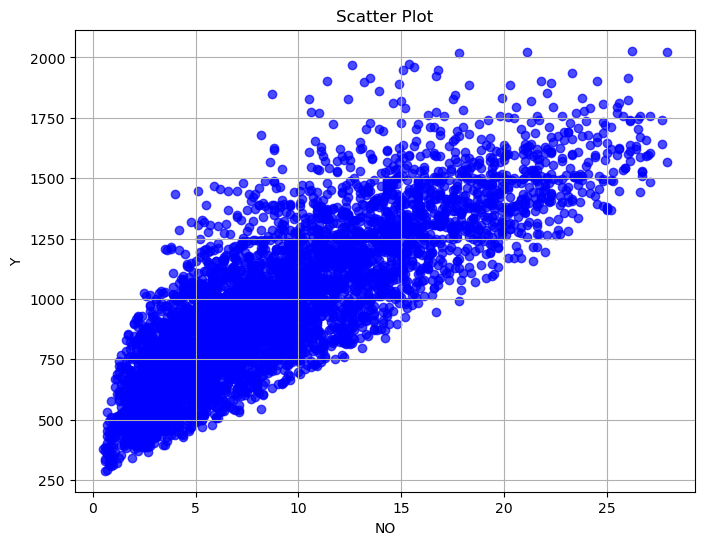

In [2734]:
correlation = train_data['C6H6(GT)'].corr(train_data['PT08.S5(O3)'])
print("Correlation between  and : ",correlation)
plt.figure(figsize=(8, 6))
plt.scatter(train_data['C6H6(GT)'], train_data['PT08.S5(O3)'], color='blue', alpha=0.7)
plt.title("Scatter Plot")
plt.xlabel("NO")
plt.ylabel("Y")
plt.grid()
plt.show()

Yes, there is a high-correlation.

3. Compute the Pearson’s correlation between all pairs of variables 1-12. Assign the resulting
correlation values in a 12x12 matrix C, whose (i; j) element represents the correlation value
between variables i and j, i.e., C(i; j) = corr(i; j). Visualize the resulting matrix C with a
heatmap and discuss potential associations between the considered variables. Note: You
can use the ‘heatmap’ function from ‘seaborn’.

In [2738]:
import numpy as np

def pearson_correlation(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x ** 2)
    sum_y2 = np.sum(y ** 2)
    sum_xy = np.sum(x * y)
    
    numerator = n * sum_xy - sum_x * sum_y
    denominator = np.sqrt((n * sum_x2 - sum_x ** 2) * (n * sum_y2 - sum_y ** 2))
    
    if denominator == 0:
        return 0 
    return numerator / denominator

C = np.zeros((12, 12)) 
num_columns = train_data.shape[1]
for i in range(num_columns):
    for j in range(num_columns):
        C[i, j] = pearson_correlation(train_data.iloc[:, i], train_data.iloc[:, j])

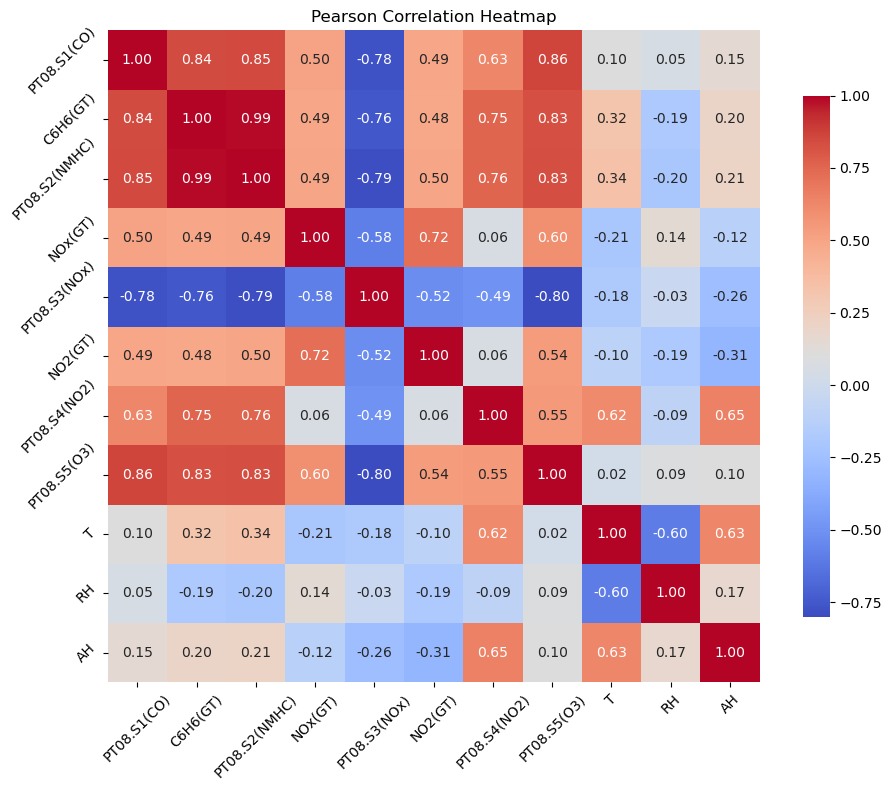

In [2740]:
import seaborn as sns
C = train_data.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(C, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Pearson Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Here, we can see that the correlation of target "PTO8.S1(CO)" is  very high with C6H6(GT), PTO8.S2(NMHC)and PTO8.S5(O3), and very low with PTO8.S3(NOx). In general, we can observe high correlation between the PTO8 values. Also, the correlation between C6H6(GT) and PTO8.S2(NMHC) is the highest in the matrix at 0.98.

(c) (20 points) Linear Regression Implementation Implement a linear regression model
from scratch to regress the target variable, Carbon monoxide (CO). (Remember: You can not
use any libraries for the linear regression model.)

Equation for Linear Regression given by,
$$
h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$$

Cost function is the mean squared error given by,
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

Gradient descent update rule given by,
$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

In [2747]:
from sklearn.preprocessing import StandardScaler
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=10000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta_history = []
        self.feature_scaler = StandardScaler()  # For features
        self.label_scaler = StandardScaler()    # For labels

    def fit(self, X, y):
        if isinstance(X, (pd.DataFrame, pd.Series)):
            X = X.to_numpy()
        if isinstance(y, (pd.DataFrame, pd.Series)):
            y = y.to_numpy().ravel()

        # Scaling the features and labels
        X_scaled = self.feature_scaler.fit_transform(X)
        y_scaled = self.label_scaler.fit_transform(y.reshape(-1, 1)).ravel()  # Scale labels

        self.m, self.n = X_scaled.shape
        self.theta = np.zeros(self.n + 1)
        X_scaled = np.insert(X_scaled, 0, 1, axis=1)  # Add bias term
        self.cost_history = []

        for i in range(self.iterations):
            self.gradient_descent(X_scaled, y_scaled)  # Use scaled labels
            cost = self.compute_cost(X_scaled, y_scaled)
            self.cost_history.append(cost)  # Store the cost
            self.theta_history.append(self.theta.copy())  # Store the current theta values

    def gradient_descent(self, X, y):
        # Hypothesis
        predictions = X.dot(self.theta)
        # Error
        error = predictions - y
        gradient = (1 / self.m) * X.T.dot(error)
        # Update theta
        self.theta -= self.learning_rate * gradient

    def compute_cost(self, X, y):
        predictions = X.dot(self.theta)
        # Error
        error = predictions - y
        # Cost function (mean squared error)
        cost = (1 / (2 * self.m)) * np.sum(error ** 2)
        return cost

    def predict(self, X):
        if isinstance(X, (pd.DataFrame, pd.Series)):
            X = X.to_numpy()
        # Reverse Scaling implemented
        X_scaled = self.feature_scaler.transform(X)
        X_scaled = np.insert(X_scaled, 0, 1, axis=1)
        scaled_predictions = X_scaled.dot(self.theta)
        return self.label_scaler.inverse_transform(scaled_predictions.reshape(-1, 1)).ravel()


Reference: https://www.geeksforgeeks.org/linear-regression-implementation-from-scratch-using-python/

Scaling is done for both features and targets in the Linear regression model. This was done because when the model was being run with sclaing performed only on the feature set, the bias $\theta_0$ was being assigned astronomically high values. The predict method reverses the scaling to ensure that the predicted values can be compared to targets.

In [2751]:
target="PT08.S1(CO)"
y_train_linear=train_data[[target]]
#y_train_linear=y_train-np.mean(y_train)
X_train_linear=train_data.drop(columns=[target])
print(y_train_linear.shape, X_train.shape)

(5297, 1) (5297, 10)


In [2753]:
LR_model=LinearRegression(iterations=1000, learning_rate=0.001)
LR_model.fit(X_train_linear,y_train_linear)

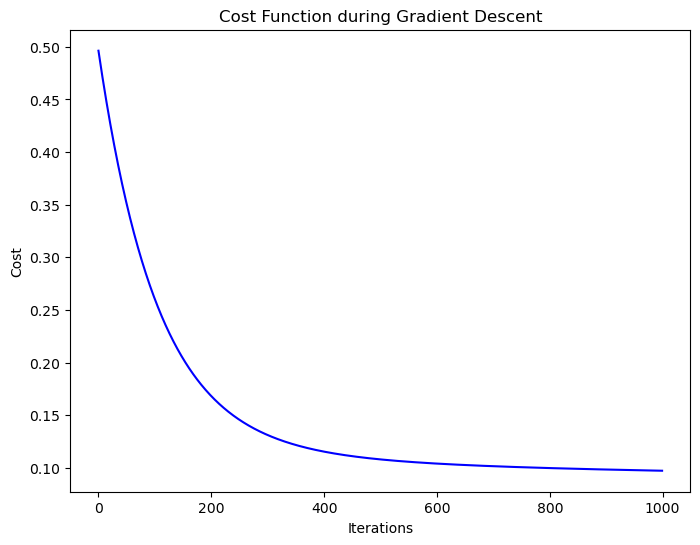

In [2755]:
plt.figure(figsize=(8, 6))
plt.plot(range(LR_model.iterations), LR_model.cost_history, color='blue')
plt.title('Cost Function during Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Here we can see that the gradient descent converges well.

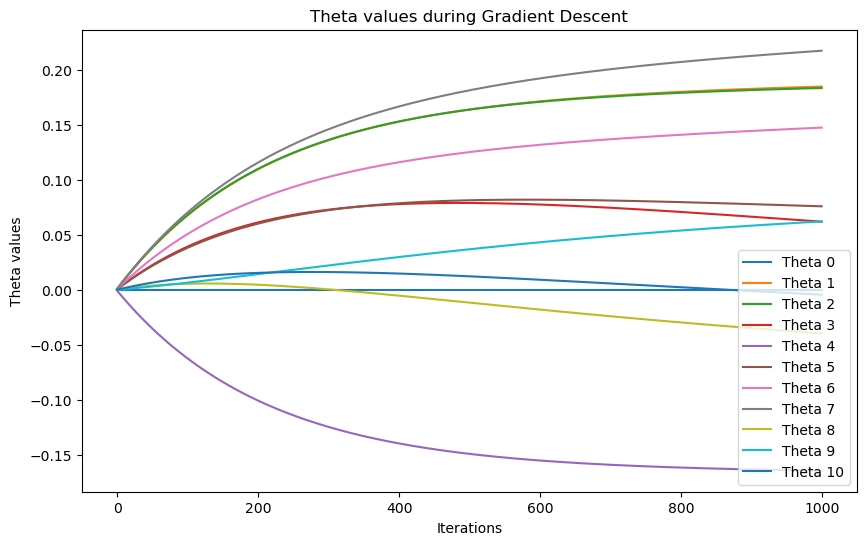

In [2758]:
theta_history = np.array(LR_model.theta_history)
plt.figure(figsize=(10, 6))
for i in range(theta_history.shape[1]):
    plt.plot(range(LR_model.iterations), theta_history[:, i], label=f'Theta {i}')
plt.title('Theta values during Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Theta values')
plt.legend()
plt.show()

Theta values were plotted to debug the problems with data, as high bias value was observed during the early stages of the code development. We can see here that theta 4 has a very low value, further confirming the low correlation value between PTO8.S3(NOx) and PT08.S1(CO)

(e) (10 points) Result Analysis - Linear Regression Perform a 5-fold cross validation.
Compute RMSE for each validation set across 5 folds. Report average and standard deviation
of RMSE values. Do you see a big change across different folds? How can you use the coefficient
of this model to find the most informative features?

In [2762]:
def cross_validate_rmse(X, y, model, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_values = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        predictions = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, predictions))
        rmse_values.append(rmse)
    
    return rmse_values

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [2765]:
rmse_values = cross_validate_rmse(X_train, y_train, LR_model, n_splits=5)
average_rmse = np.mean(rmse_values)
std_rmse = np.std(rmse_values)
print("RMSE values for each fold:", rmse_values)
print("Average RMSE:", average_rmse)
print("Standard Deviation of RMSE:", std_rmse)
y_train_mean = np.mean(y_train)
y_train_centered = y_train - y_train_mean
LR_model.fit(X_train, y_train_centered)
print("Model coefficients (theta values):", LR_model.theta)

RMSE values for each fold: [79.42737614101134, 79.38583994185626, 76.18575647729097, 75.68596368946129, 77.43921626174387]
Average RMSE: 77.62483050227274
Standard Deviation of RMSE: 1.5630045578643585
Model coefficients (theta values): [-8.78568504e-18  1.84588942e-01  1.83276492e-01  6.18885937e-02
 -1.64233898e-01  7.58499379e-02  1.47313136e-01  2.17121991e-01
 -3.94909746e-02  6.21234078e-02 -4.46455693e-03]


Here, we see that the standard deviation of the RMSE is low. Models with high coefficients are the most informative of the target. The values of coefficients concur the observations made with the correlation matrix plot and the theta value plot.

d) (20 points) Logistic Regression Implementation Using the column PT08.S1(CO),
create a binary label for this dataset where the values more than 1000 correspond to label 1
and the values less than or equal to 1000 correspond to label 0. Implement a logistic regression
model from scratch to predict this binary label. (Remember: You can not use any libraries
for the logistic regression model.)

Sigmoid function given by,
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$


Cost function given by,
$$
J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(y_{\text{predicted}}^{(i)}) + (1 - y^{(i)}) \log(1 - y_{\text{predicted}}^{(i)}) \right]
$$


Gradient for weights:
$$
dw = \frac{1}{m} \sum_{i=1}^{m} (y_{\text{predicted}}^{(i)} - y^{(i)}) \cdot X^{(i)}
$$


Gradient for bias,
$$
db = \frac{1}{m} \sum_{i=1}^{m} (y_{\text{predicted}}^{(i)} - y^{(i)})
$$


In [2773]:
target_class = pd.DataFrame()
target_class['PT08.S1(CO)'] = (train_data['PT08.S1(CO)'] > 1000).astype(int)

Here, we transform the labels according to the rule given in the question

In [2776]:
class LogisticRegression_manual:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.scaler = StandardScaler()  # Initialize StandardScaler for feature scaling

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Scale the features only
        X_scaled = self.scaler.fit_transform(X)

        num_samples, num_features = X_scaled.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        for _ in range(self.num_iterations):
            linear_model = np.dot(X_scaled, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X_scaled.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Scale features
        X_scaled = self.scaler.transform(X)

        linear_model = np.dot(X_scaled, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

    def predict_proba(self, X):
        # Scale features
        X_scaled = self.scaler.transform(X)

        linear_model = np.dot(X_scaled, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.column_stack((1 - y_predicted, y_predicted))  # Return probabilities for both classes

(f ) (10 points) Result Analysis - Logistic Regression Perform a 5-fold cross validation.
Compute accuracy, precision, recall, and F1 score for each validation set across 5 folds. Report
the average and standard deviation of these metrics. Do you see a big change across different
folds?
(g) (10 points) ROC Curve - Logistic Regression Use the logistic regression model from
sklearn and repeat 5-fold cross validation. Then using roc curve package from sklearn.metrics,
plot the ROC curve for each fold and compute the area under the curve. Is this result consistent
with the results you obtained using the logistic regression model you implemented?

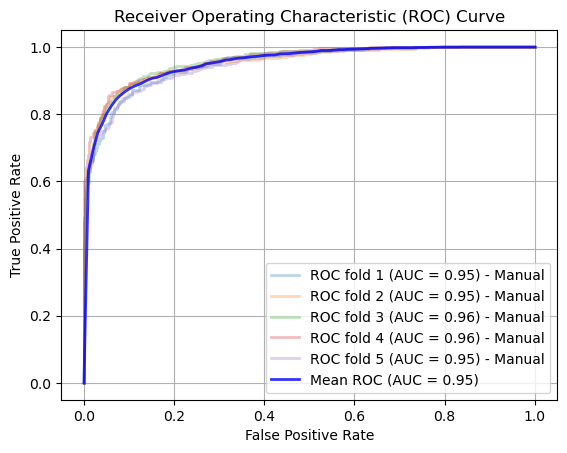

In [2779]:
from sklearn.model_selection import KFold
from sklearn.metrics import (
    roc_curve,
    auc,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

def cross_validation(X, y, model, folds=5):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    global tprs_2 
    tprs_2 = []
    global aucs_2 
    aucs_2 = []
    global mean_fpr_2
    mean_fpr_2 = np.linspace(0, 1, 100)
    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    }
    
    # Perform cross-validation
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        # Split the data using iloc for DataFrames
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()  # Flatten y       
        # Fit the model
        model.fit(X_train, y_train)      
        # Make predictions
        y_pred = model.predict(X_test)        
        y_proba_2 = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1       
       
        fpr_2, tpr_2, _ = roc_curve(y_test, y_proba_2)
        roc_auc_2 = auc(fpr_2, tpr_2)
        aucs_2.append(roc_auc_2)

        plt.plot(fpr_2, tpr_2, lw=2, alpha=0.3, label=f'ROC fold {i+1} (AUC = {roc_auc_2:.2f}) - Manual')

        tprs_2.append(np.interp(mean_fpr_2, fpr_2, tpr_2))
        tprs_2[-1][0] = 0.0  # Set the first point of TPR to 0.0

        metrics['accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['precision'].append(precision_score(y_test, y_pred))
        metrics['recall'].append(recall_score(y_test, y_pred))
        metrics['f1_score'].append(f1_score(y_test, y_pred))

    avg_metrics = {metric: np.mean(scores) for metric, scores in metrics.items()}
    std_metrics = {metric: np.std(scores) for metric, scores in metrics.items()}

    mean_tpr_2 = np.mean(tprs_2, axis=0)
    mean_tpr_2[-1] = 1.0  # Ensure last point is 1
    mean_auc_2 = auc(mean_fpr_2, mean_tpr_2)
    plt.plot(mean_fpr_2, mean_tpr_2, color='b', label=f'Mean ROC (AUC = {mean_auc_2:.2f})', lw=2, alpha=0.8)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    return avg_metrics, std_metrics

model_log = LogisticRegression_manual()  # Assuming you've defined this model
avg_metrics, std_metrics = cross_validation(X_train, target_class, model_log, folds=5)



The changes are minimal between each folds. 

In [2782]:
print("Average Metrics:", average_metrics)
print("Standard Deviation of Metrics:", std_metrics)

Average Metrics: {'accuracy': 0.8855958807703956, 'precision': 0.9272741971058271, 'recall': 0.8835662214549369, 'f1_score': 0.9048480126963522}
Standard Deviation of Metrics: {'accuracy': 0.008408741627053826, 'precision': 0.012506828033707049, 'recall': 0.007749659017736094, 'f1_score': 0.008040517246059977}


(g) (10 points) ROC Curve - Logistic Regression Use the logistic regression model from
sklearn and repeat 5-fold cross validation. Then using roc curve package from sklearn.metrics,
plot the ROC curve for each fold and compute the area under the curve. Is this result consistent
with the results you obtained using the logistic regression model you implemented?

In [2785]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc

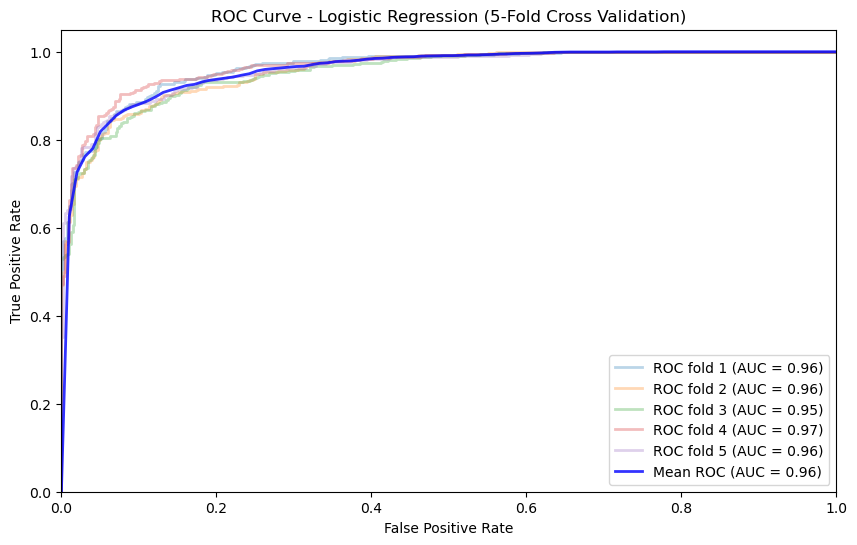

Mean AUC across folds: 0.96


In [2787]:
target = "PT08.S1(CO)"
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
fs = StandardScaler()
y_train = train_data[[target]]
t_data = train_data.drop(columns=[target])
X_train = pd.DataFrame(fs.fit_transform(t_data), columns=t_data.columns)  # Scaling features

kf = KFold(n_splits=5, shuffle=True, random_state=1)
log_reg = LogisticRegression()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 6))

for i, (train_index, test_index) in enumerate(kf.split(X_train.values)):
    # Split the data
    X_train_log, X_test_log = X_train.values[train_index], X_train.values[test_index]
    y_train_log, y_test_log = target_class['PT08.S1(CO)'].values[train_index], target_class['PT08.S1(CO)'].values[test_index]
    
    # Fit the model
    log_reg.fit(X_train_log, y_train_log)
    
    # Predict probabilities
    y_proba = log_reg.predict_proba(X_test_log)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_log, y_proba)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC fold {i+1} (AUC = {roc_auc:.2f})')
 
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0


mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)


plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plotting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (5-Fold Cross Validation)')
plt.legend(loc="lower right")
plt.show()


print(f'Mean AUC across folds: {mean_auc:.2f}')


Yes, the result is consistent with the manually implemented logistic regression model.

h) Inference - Linear and Logistic Regression
1. Use the trained linear regression model and predict the PT08.S1(CO) value for the test
data.
2. Use the trained logistic regression model and predict the PT08.S1(CO) binary value (the
same label you created in step d) for the test data.
3. Save the predictions in a csv file with two main columns. One for the linear regression
predictions with the name pred linear and one for the logistic regression predictions with
the name pred logistic.
4. Add this csv file to your submission.

In [2791]:
X_test_data=test_data.drop(columns=['NMHC(GT)'])
X_test_data.head()

,C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,8.0,898.0,122.0,933.0,105.0,1594.0,1098.0,17.0,51.7,0.9914
1,19.4,1281.0,-200.0,774.0,-200.0,1952.0,1324.0,20.8,43.6,1.0614
2,9.9,975.0,349.0,638.0,223.0,1243.0,1064.0,5.6,74.6,0.6826
3,12.7,1075.0,103.0,749.0,98.0,1690.0,1022.0,31.7,21.5,0.9902
4,2.9,647.0,131.0,1054.0,85.0,962.0,828.0,8.4,54.5,0.6022


In [2799]:
LR_model=LinearRegression(iterations=1000, learning_rate=0.001)
LR_model.fit(X_train_linear,y_train_linear)
pred_linear = LR_model.predict(X_test_data)

In [2801]:
pred_logistic = model_log.predict(X_test_data)

/var/folders/yp/0g_p5lwd62j955c_8v5nw4rc0000gn/T/ipykernel_34848/935875635.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [2803]:
predictions_df = pd.DataFrame({
    'pred_linear': pred_linear,
    'pred_logistic': pred_logistic
})

predictions_df.to_csv('Shyam_Sankar_preds.csv', index=False)